# PYTHON TASK: 
Based on the stated dataset, devise a minimum of 4 exploratory questions to be answered via association rule mining. Following that, devise a pipeline for preprocessing, mining, and knowledge evaluation, then implement the python codes for the process. Steps should include, but not limited to the following:  
1. Data Exploration (statistics and visualization) 
2. Data Preprocessing (cleaning, transformation) 
3. Data Mining (association rule mining) 
4. Knowledge evaluation (interestingness measure) 
Note:  
- You may create separate python notebooks for the tasks if necessary. 
- Please  include  a  reference  list  at  the  end  of  the  notebook(s)  of  any  tutorials,  GitHub  codes, websites, videos, etc. used for learning and reference to complete the tasks.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing (cleaning, transformation) 

## Loading the data

In [45]:
df_raw = pd.read_csv('DATA.csv')
df_raw.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [46]:
print(df_raw.shape)
print(df_raw.dtypes)

(145, 33)
STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object


## Cleaning the data

In [47]:
# Check nulls
df_raw.isna().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

In [48]:
df_raw.drop_duplicates(inplace=True)
print(df_raw.shape)

(145, 33)


In [49]:
# Class Labels

# Student ID

# 1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
# 2- Sex (1: female, 2: male)
# 3- Graduated high-school type: (1: private, 2: state, 3: other)
# 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
# 5- Additional work: (1: Yes, 2: No)
# 6- Regular artistic or sports activity: (1: Yes, 2: No)
# 7- Do you have a partner: (1: Yes, 2: No)
# 8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
# 9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
# 10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
# 11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
# 14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
# 15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
# 16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
# 17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
# 18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
# 21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
# 22- Attendance to classes (1: always, 2: sometimes, 3: never)
# 23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
# 24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
# 25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
# 26- Listening in classes: (1: never, 2: sometimes, 3: always)
# 27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
# 28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
# 29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 31- Course ID
# 32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [50]:
# Rename cols
dict_header = {'1': 'AGE', '2': 'GENDER', '3': 'HS_TYPE', '4': 'SCHOLARSHIP', '5': 'WORK', '6': 'ACTIVITY', '7': 'PARTNER', '8': 'SALARY', '9': 'TRANSPORT', '10': 'ACCOMODATION',
               '11': 'MOTHER_EDUCATION', '12': 'FATHER_EDUCATION', '13': 'SIBLINGS', '14': 'PARENTAL_STATUS', '15': 'MOTHER_JOB', '16': 'FATHER_JOB',
               '17': 'STUDY_HOURS', '18': 'READING_NONSCI', '19': 'READING_SCI',
               '20': 'ATTENDANCE_SEMINAR', '21': 'IMPACT', '22': 'ATTENDANCE_CLASS',
               '23': 'MIDTERM_PEOPLE', '24': 'MIDTERM_TIME',
               '25': 'CLASS_NOTES', '26': 'CLASS_LISTENING', '27': 'DISCUSSION', '28': 'FLIP_CLASSROOM', '29': 'CGPA_PREV', '30': 'CGPA_EXPECTED'}

In [51]:
# Renaming
dict_data = {
    'AGE': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'GENDER': {
        1: 'Female',
        2: 'Male'
    },
    'HS_TYPE': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'SCHOLARSHIP': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'WORK': {
        1: 'Yes',
        2: 'No'
    },
    'ACTIVITY': {
        1: 'Yes',
        2: 'No'
    },
    'PARTNER': {
        1: 'Yes',
        2: 'No'
    },
    'SALARY': {
        1: 'USD 135-200',
        2: 'USD 201-270',
        3: 'USD 271-340',
        4: 'USD 341-410',
        5: 'Above 410'
    },
    'TRANSPORT': {
        1: 'Bus',
        2: 'Private Car/Taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'ACCOMODATION': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'MOTHER_EDUCATION': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'FATHER_EDUCATION': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    }, 
    'PARENTAL_STATUS': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'MOTHER_JOB': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'FATHER_JOB': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'STUDY_HOURS': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'READING_NONSCI': {
        1: 'None',
        2: 'Sometimes',
        3: 'Often'
    },
    'READING_SCI': {
        1: 'None',
        2: 'Sometimes',
        3: 'Often'
    },
    'ATTENDANCE_SEMINAR': {
        1: 'Yes',
        2: 'No'
    },
    'IMPACT': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'ATTENDANCE_CLASS': {
        1: 'Always',
        2: 'Sometimes',
        3: 'Never'
    },
    'MIDTERM_PEOPLE': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'MIDTERM_TIME': {
        1: 'Closest date to the exam',
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'CLASS_NOTES': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'CLASS_LISTENING': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'DISCUSSION': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'FLIP_CLASSROOM':{
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'CGPA_PREV': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'CGPA_EXPECTED': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'GRADE': {
        0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'
    }
}

In [52]:
df_rename = df_raw.copy()
df_rename.rename(columns=dict_header, inplace=True)

df_raw_clean = df_raw.copy()
df_raw_clean.rename(columns=dict_header, inplace=True)

for col, mapping in dict_data.items():
    df_rename[col] = df_rename[col].map(mapping)

display(df_rename.head())
display(df_raw_clean.head())

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,Male,State,50%,No,No,No,USD 201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,USD 201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,USD 271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,DD


,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [53]:
df_rename.nunique()

STUDENT ID            145
AGE                     3
GENDER                  2
HS_TYPE                 3
SCHOLARSHIP             5
WORK                    2
ACTIVITY                2
PARTNER                 2
SALARY                  5
TRANSPORT               4
ACCOMODATION            4
MOTHER_EDUCATION        6
FATHER_EDUCATION        6
SIBLINGS                5
PARENTAL_STATUS         3
MOTHER_JOB              5
FATHER_JOB              5
STUDY_HOURS             5
READING_NONSCI          3
READING_SCI             3
ATTENDANCE_SEMINAR      2
IMPACT                  3
ATTENDANCE_CLASS        2
MIDTERM_PEOPLE          3
MIDTERM_TIME            3
CLASS_NOTES             3
CLASS_LISTENING         3
DISCUSSION              3
FLIP_CLASSROOM          3
CGPA_PREV               5
CGPA_EXPECTED           4
COURSE ID               9
GRADE                   8
dtype: int64

# Data Exploration (statistics and visualization) 

In [54]:
# styling the plot outputs

sns.set_palette("gist_earth")
sns.set_style('darkgrid')
colours_list = ["viridis", "rocket", 'mako']

In [55]:
df = df_rename.copy()

In [56]:
df.describe()

,SIBLINGS,COURSE ID
count,145.000000,145.000000
mean,2.806897,4.131034
std,1.360640,3.260145
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,3.000000
75%,4.000000,7.000000
max,5.000000,9.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STUDENT ID          145 non-null    object
 1   AGE                 145 non-null    object
 2   GENDER              145 non-null    object
 3   HS_TYPE             145 non-null    object
 4   SCHOLARSHIP         145 non-null    object
 5   WORK                145 non-null    object
 6   ACTIVITY            145 non-null    object
 7   PARTNER             145 non-null    object
 8   SALARY              145 non-null    object
 9   TRANSPORT           145 non-null    object
 10  ACCOMODATION        145 non-null    object
 11  MOTHER_EDUCATION    145 non-null    object
 12  FATHER_EDUCATION    145 non-null    object
 13  SIBLINGS            145 non-null    int64 
 14  PARENTAL_STATUS     145 non-null    object
 15  MOTHER_JOB          145 non-null    object
 16  FATHER_JOB          145 no

<Axes: >

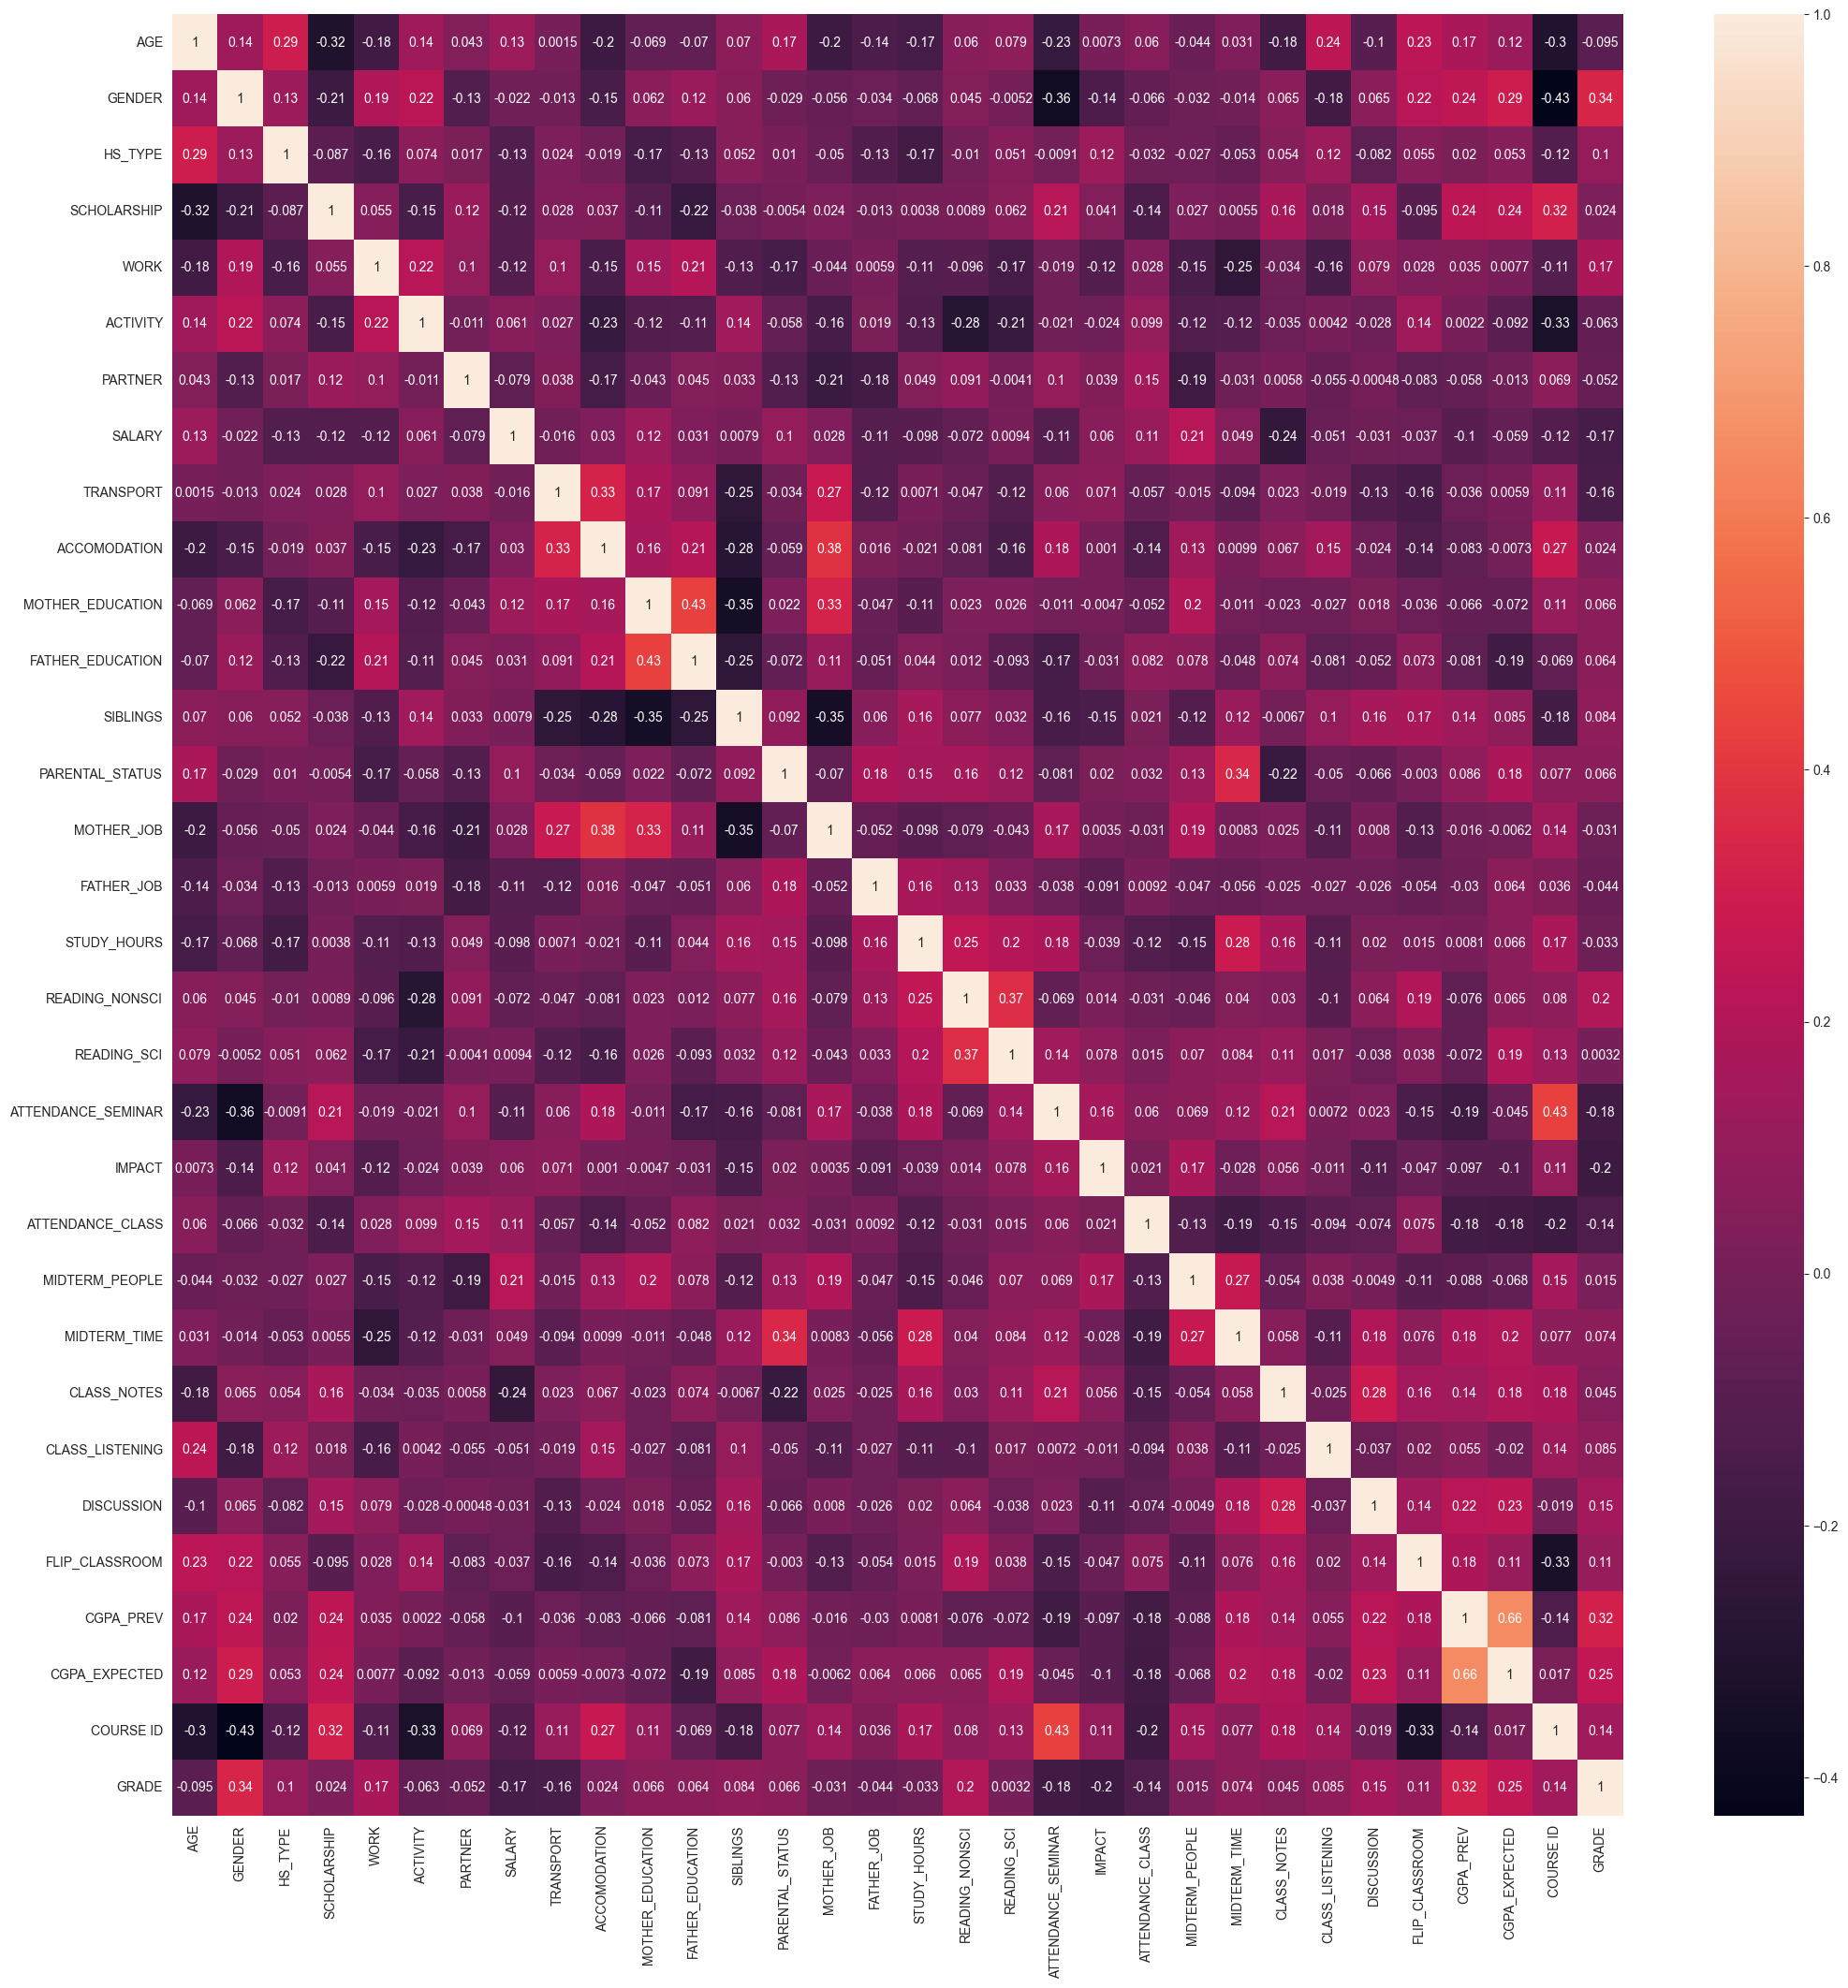

In [58]:
corrmat = df_raw_clean.corr(numeric_only=True)

plt.figure(figsize=(25,25))
sns.heatmap(corrmat, annot=True)

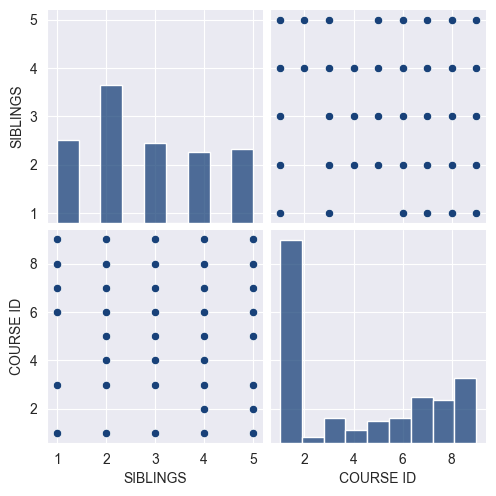

In [59]:
sns.pairplot(data=df.select_dtypes(include='number'))

C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\1578330595.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(x = df[col])


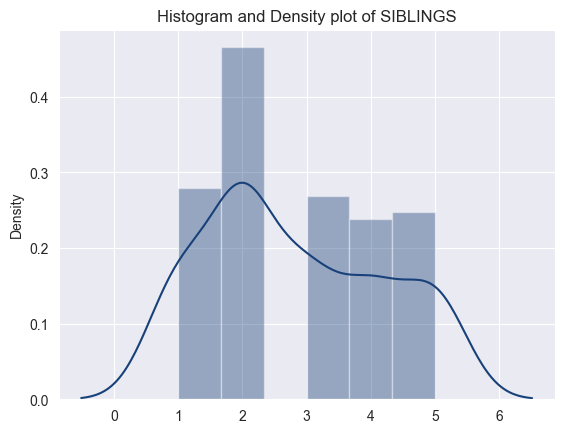

C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\1578330595.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(x = df[col])


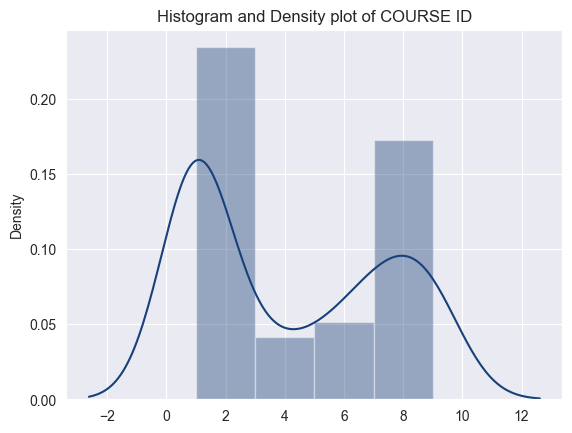

In [60]:
for col in df.select_dtypes(include='number'):
  fig = sns.distplot(x = df[col])
  fig.set(title=f'Histogram and Density plot of {col}')
  plt.show()

In [61]:
for col in df:
    print('Unique values for ', col)
    print(df[col].unique())
    print('--------------------------------')

Unique values for  STUDENT ID
['STUDENT1' 'STUDENT2' 'STUDENT3' 'STUDENT4' 'STUDENT5' 'STUDENT6'
 'STUDENT7' 'STUDENT8' 'STUDENT9' 'STUDENT10' 'STUDENT11' 'STUDENT12'
 'STUDENT13' 'STUDENT14' 'STUDENT15' 'STUDENT16' 'STUDENT17' 'STUDENT18'
 'STUDENT19' 'STUDENT20' 'STUDENT21' 'STUDENT22' 'STUDENT23' 'STUDENT24'
 'STUDENT25' 'STUDENT26' 'STUDENT27' 'STUDENT28' 'STUDENT29' 'STUDENT30'
 'STUDENT31' 'STUDENT32' 'STUDENT33' 'STUDENT34' 'STUDENT35' 'STUDENT36'
 'STUDENT37' 'STUDENT38' 'STUDENT39' 'STUDENT40' 'STUDENT41' 'STUDENT42'
 'STUDENT43' 'STUDENT44' 'STUDENT45' 'STUDENT46' 'STUDENT47' 'STUDENT48'
 'STUDENT49' 'STUDENT50' 'STUDENT51' 'STUDENT52' 'STUDENT53' 'STUDENT54'
 'STUDENT55' 'STUDENT56' 'STUDENT57' 'STUDENT58' 'STUDENT59' 'STUDENT60'
 'STUDENT61' 'STUDENT62' 'STUDENT63' 'STUDENT64' 'STUDENT65' 'STUDENT66'
 'STUDENT67' 'STUDENT68' 'STUDENT69' 'STUDENT70' 'STUDENT71' 'STUDENT72'
 'STUDENT73' 'STUDENT74' 'STUDENT75' 'STUDENT76' 'STUDENT77' 'STUDENT78'
 'STUDENT79' 'STUDENT80' 'STUD

## Exploring personal questions

In [62]:
# 1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.
personal = ['STUDENT ID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'ACCOMODATION']
family = ['STUDENT ID', 'MOTHER_EDUCATION', 'FATHER_EDUCATION', 'SIBLINGS', 'PARENTAL_STATUS', 'MOTHER_JOB', 'FATHER_JOB']
edu_extra = ['STUDENT ID', 'STUDY_HOURS', 'READING_NONSCI', 'READING_SCI', 'ATTENDANCE_SEMINAR', 'IMPACT']
edu_habits = ['STUDENT ID', 'ATTENDANCE_CLASS', 'MIDTERM_PEOPLE', 'MIDTERM_TIME', 'CLASS_NOTES', 'CLASS_LISTENING', 'DISCUSSION', 'FLIP_CLASSROOM']
edu_info = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'COURSEID', 'GRADE']

Text(0.5, 0.98, 'Countplots for Family Attributes')

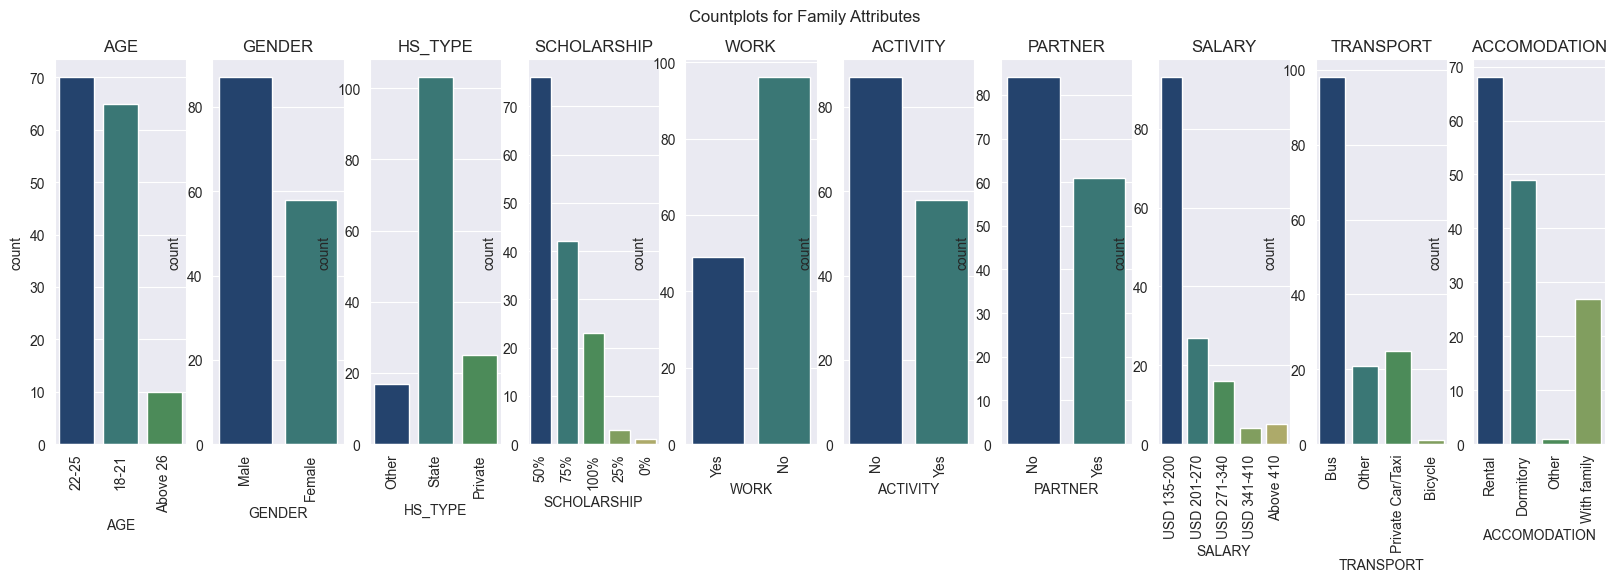

In [63]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(personal[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(personal[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Family Attributes')

C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_co

Text(0.5, 1.01, 'Countplots for Personal Attributes based on Gender')

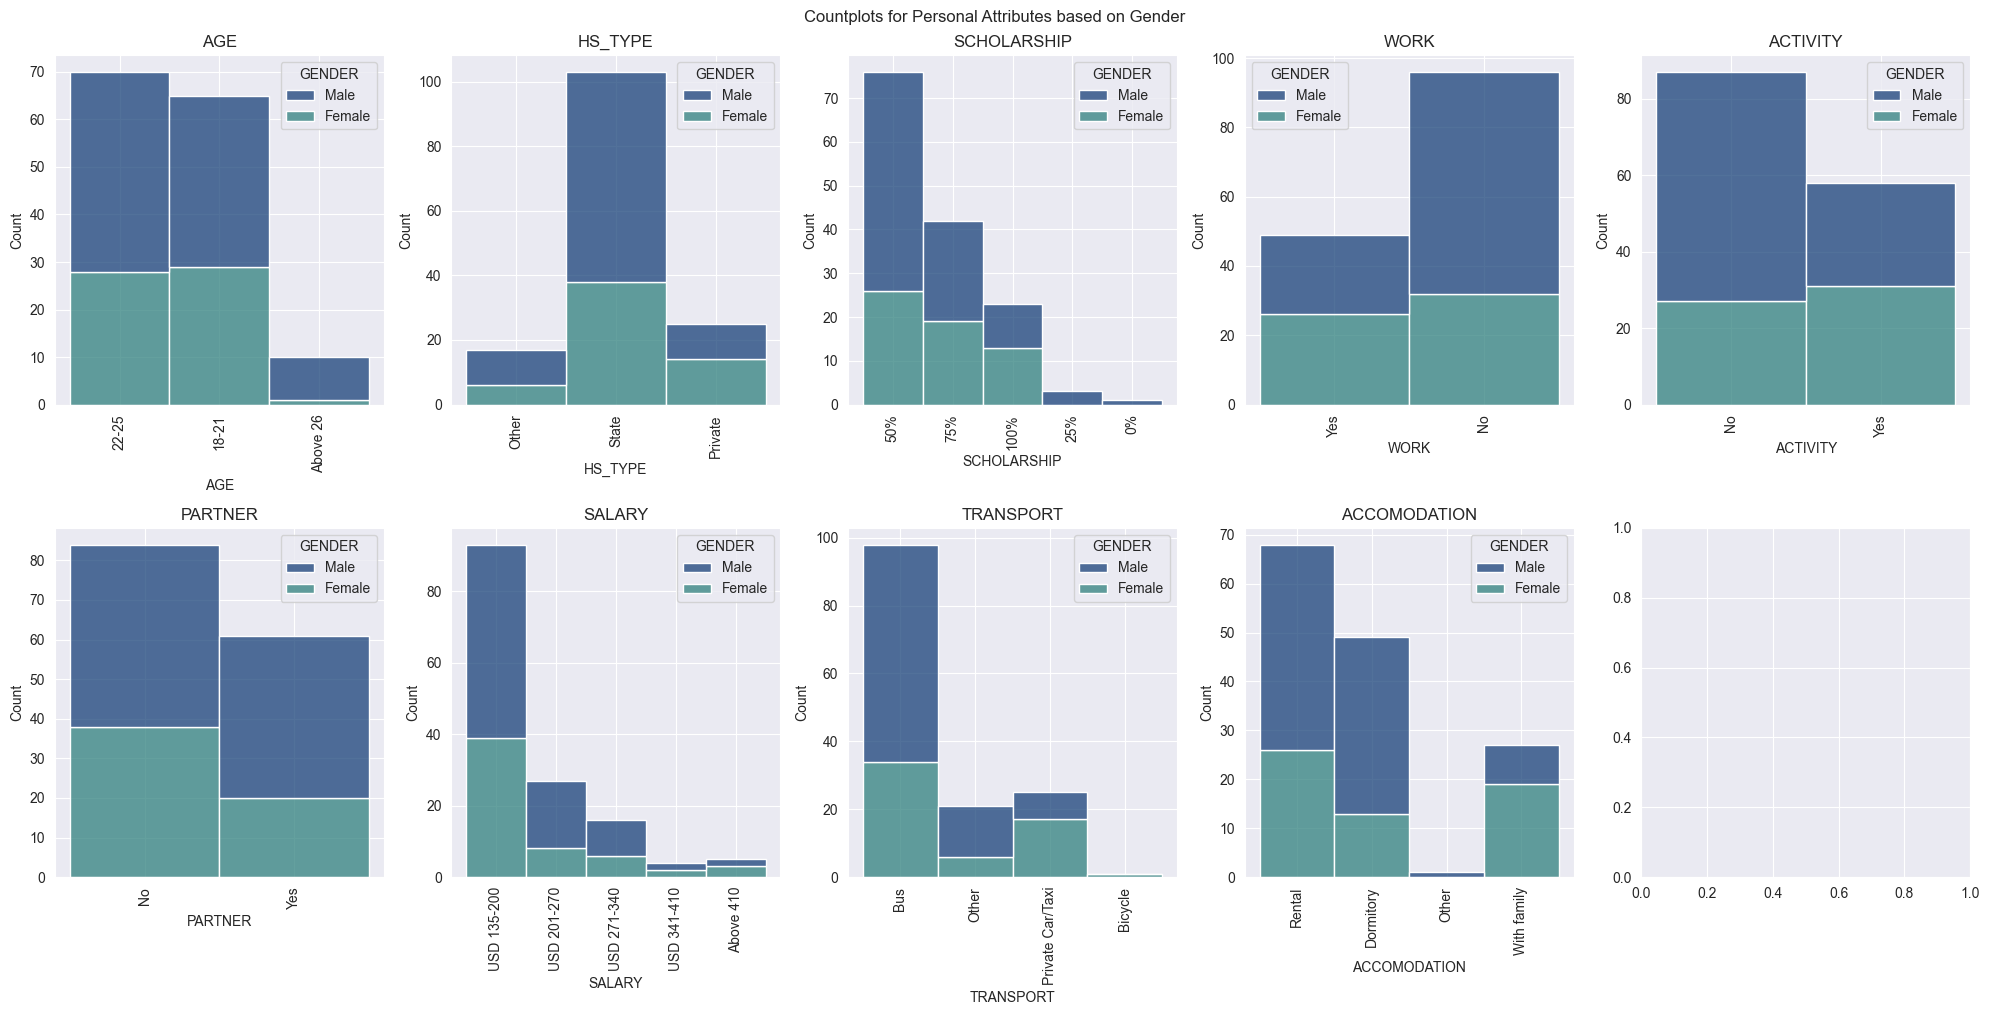

In [64]:
personal_gender = [col for col in personal[1:] if col != 'GENDER']

num_rows = 2

num_attributes = len(personal_gender)
num_cols = min(int(num_attributes / num_rows) + 1, num_attributes)  # Ensure not more columns than attributes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

for i, col in enumerate(personal_gender):
    sns.histplot(data=df, x=col, hue='GENDER', multiple='stack', ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)
    axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)

plt.tight_layout()
fig.suptitle('Countplots for Personal Attributes based on Gender', y=1.01)

C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12808\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_co

Text(0.5, 1.01, 'Countplots for Personal Attributes based on Age')

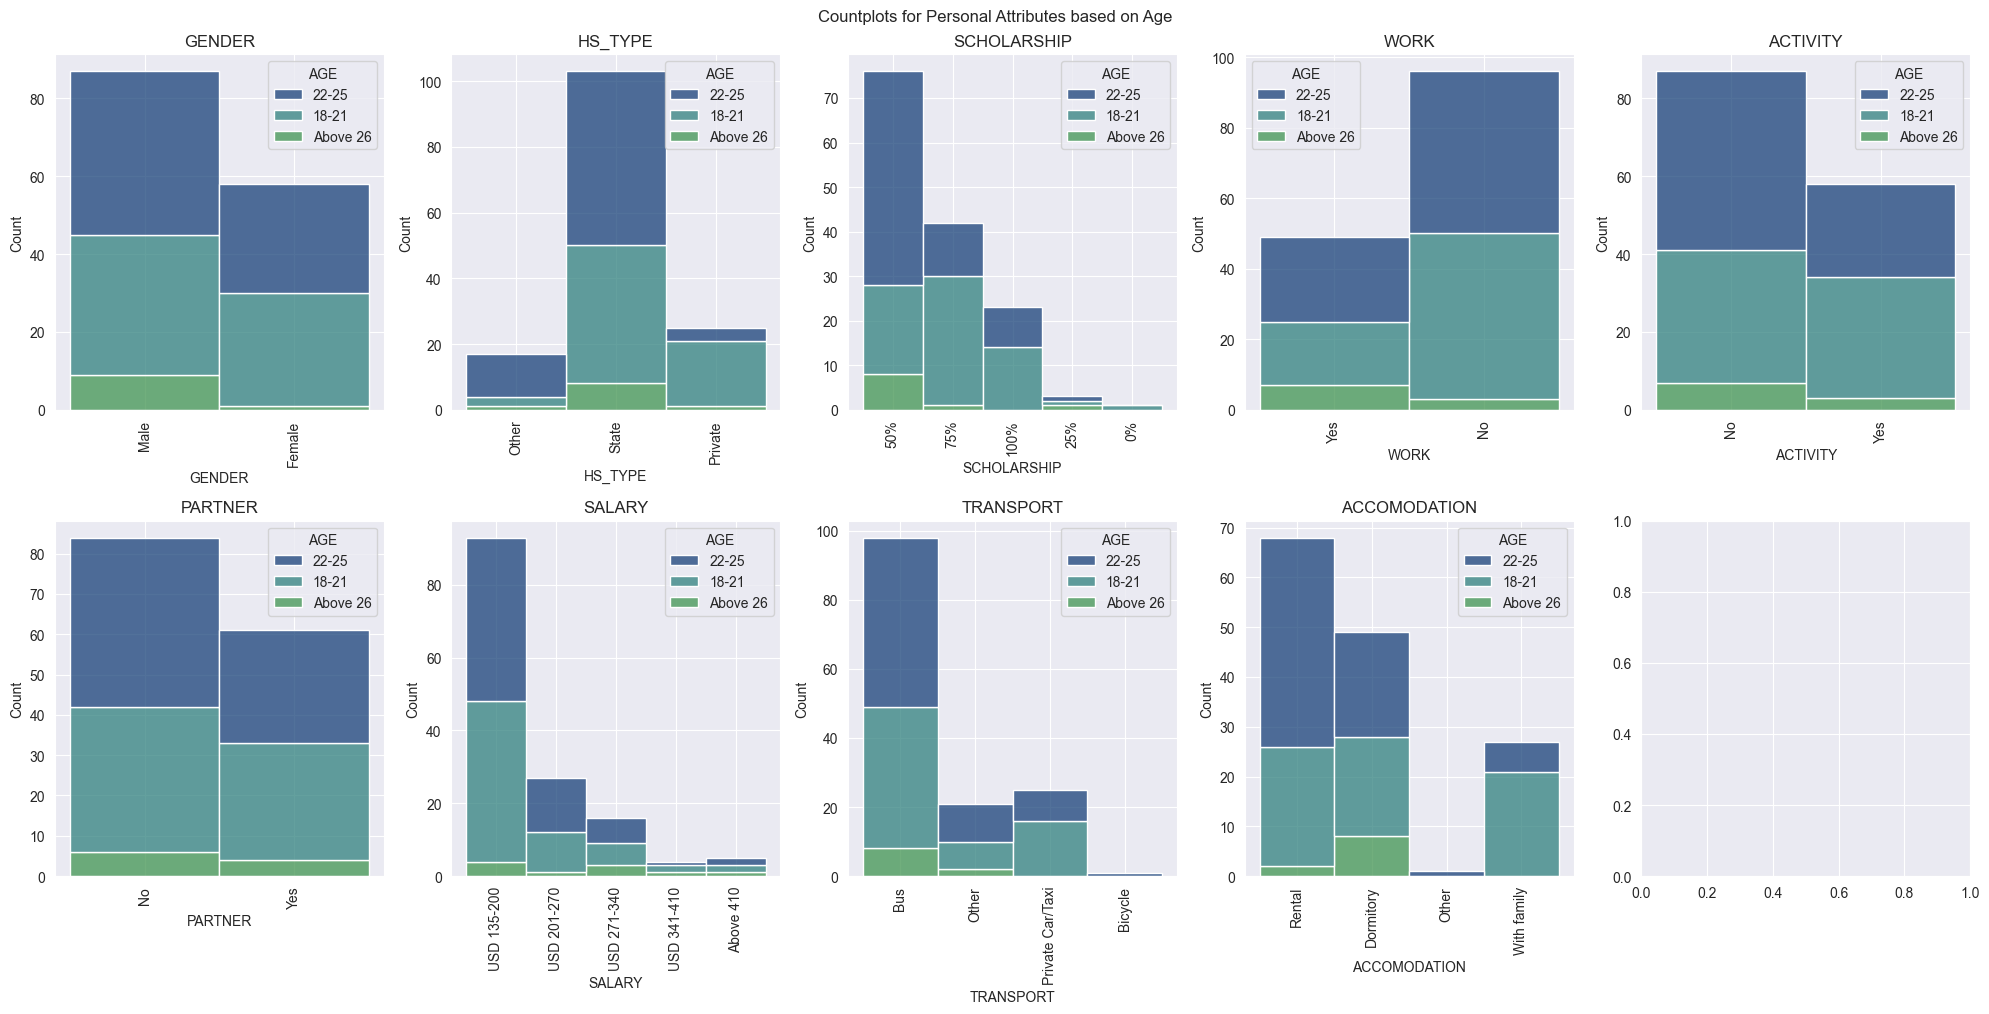

In [70]:
personal_age = [col for col in personal[1:] if col != 'AGE']

num_rows = 2

num_attributes = len(personal_age)
num_cols = min(int(num_attributes / num_rows) + 1, num_attributes)  # Ensure not more columns than attributes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

for i, col in enumerate(personal_age):
    sns.histplot(data=df, x=col, hue='AGE', multiple='stack', ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)
    axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)

plt.tight_layout()

fig.suptitle('Countplots for Personal Attributes based on Age', y=1.01)

## Exploring family questions

Text(0.5, 0.98, 'Countplots for Family Attributes')

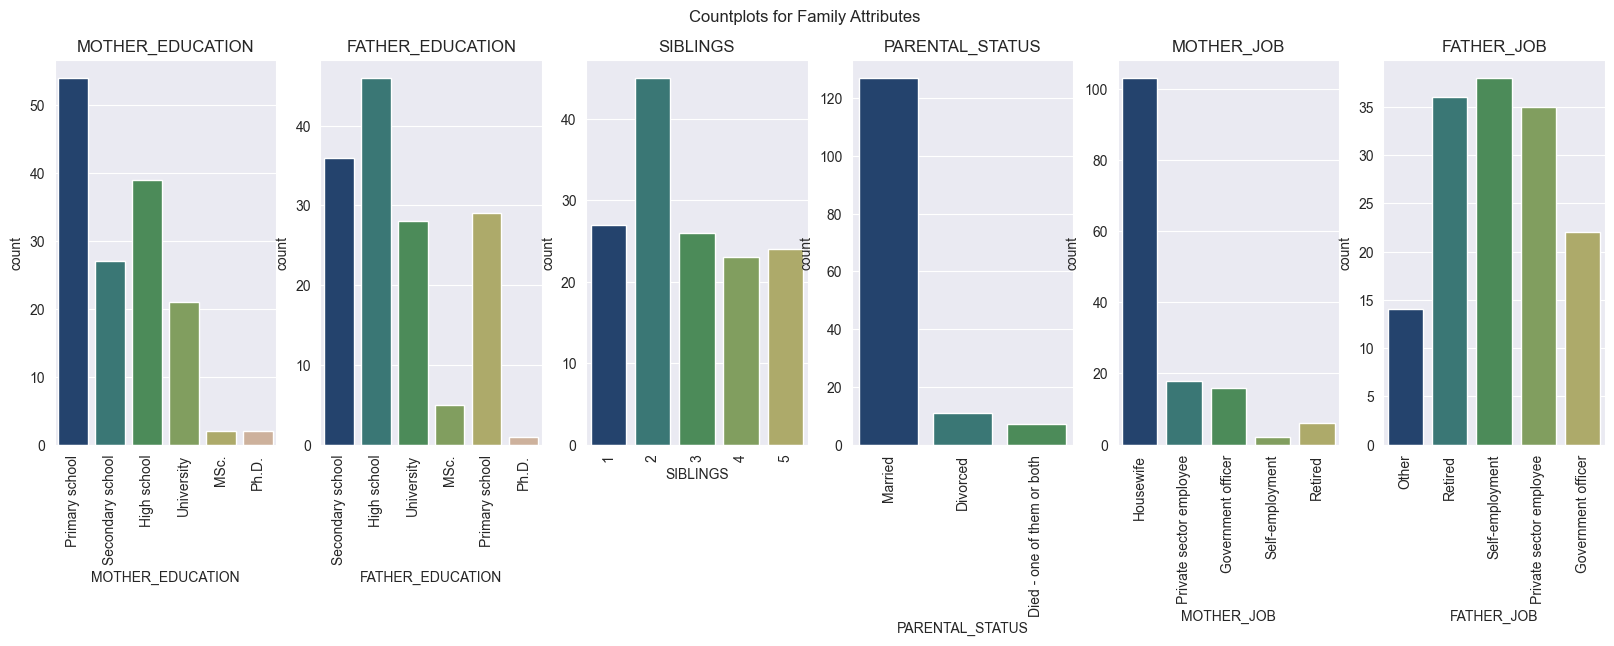

In [66]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(family[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(family[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Family Attributes')

## Exploring education questions

Text(0.5, 0.98, 'Countplots for Extracurricular Attributes')

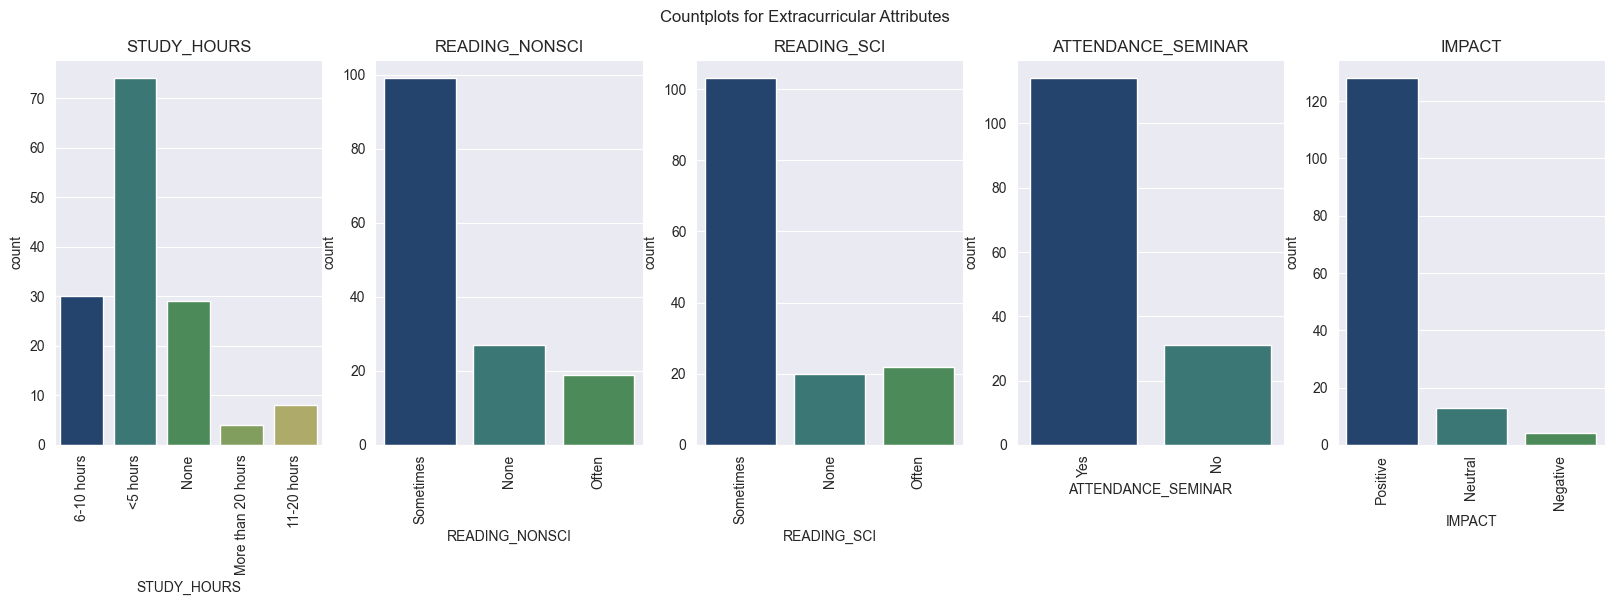

In [67]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(edu_extra[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_extra[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Extracurricular Attributes')

Text(0.5, 0.98, 'Countplots for Classroom Habits Attributes')

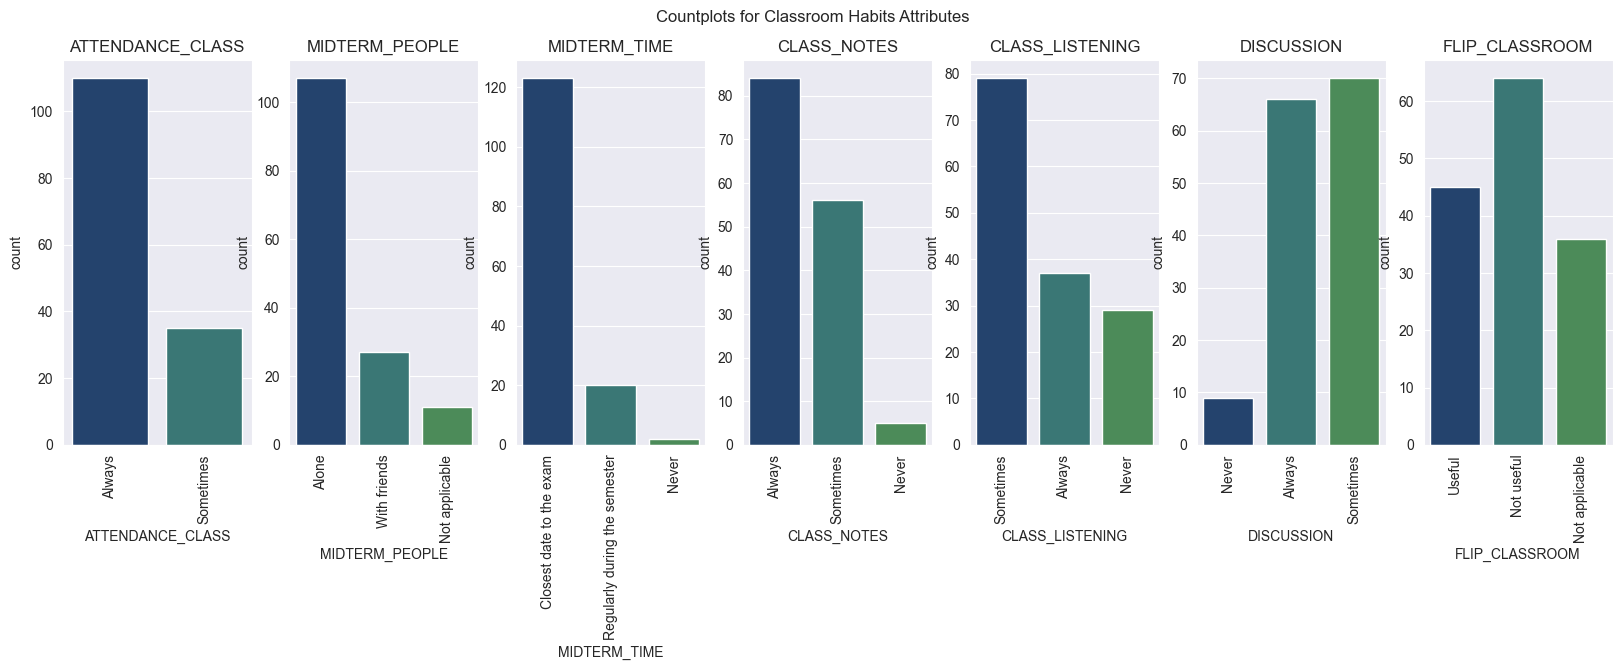

In [68]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(edu_habits[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_habits[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Classroom Habits Attributes')

Text(0.5, 0.98, 'Countplots for Grade Attributes')

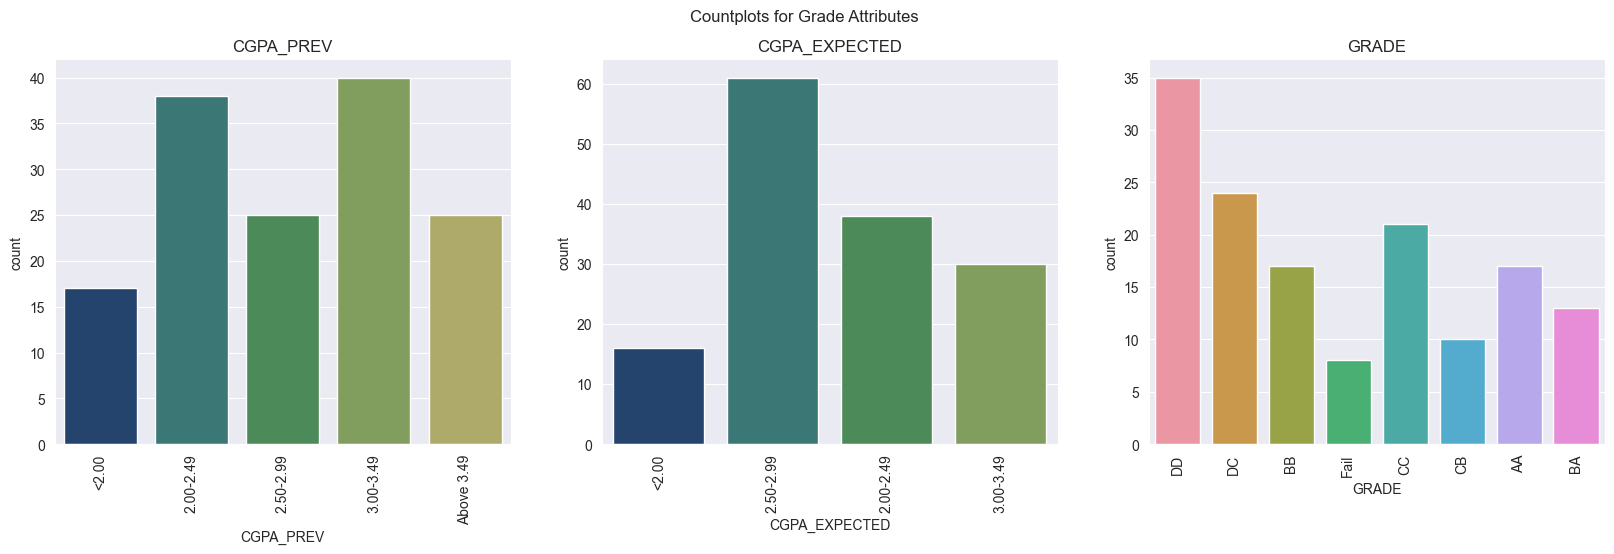

In [69]:
edu_grades = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'GRADE']
fig, axes = plt.subplots(nrows=1, ncols=len(edu_grades[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_grades[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Grade Attributes')

# Data Mining (association rule mining) 

# Knowledge evaluation (interestingness measure) 